In [86]:
%matplotlib inline 
# https://stackoverflow.com/questions/31609600/jupyter-ipython-notebook-not-plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


import datetime

## Pandas Data Structures

## Series

In [13]:
s = pd.Series([3, 4, 5], index=['a', 'b' , 'c'])
print(s)

a    3
b    4
c    5
dtype: int64


## DataFrame

In [14]:
data = {'Country': ['US', 'China', 'Canada'],
       'Capital': ['here', 'there', 'where'],
       'Population':[3, 4, 5]}
df = pd.DataFrame(data, columns=['Country', 'Capital', 'Population'])
df

,Country,Capital,Population
0,US,here,3
1,China,there,4
2,Canada,where,5


## IO

### Read and Write to CSV file

In [19]:
# Read and Write to CSV
data = pd.read_csv("census.csv")
df.to_csv('myDataFrame.csv')
df = pd.DataFrame(data)

### Read and Write to SQL

### Display

In [23]:
# Success - Display the first record
# https://stackoverflow.com/questions/49328447/display-in-python
# display(data.head(n=1))
# data.head(1)
df.head(1)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


### Data Exploration

In [26]:
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [29]:
df.columns

Index(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
age                45222 non-null int64
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
income             45222 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [32]:
# Total number of records
n_records = df['age'].count()
print(n_records)

45222


### Identify NaNs

In [35]:
df.isnull().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

### Drop NaNs

In [36]:
df.dropna()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


In [40]:
# https://pypi.org/project/pandas-profiling/
pandas_profiling.ProfileReport(df)

Number of variables,14
Number of observations,45222
Total Missing (%),0.0%
Total size in memory,4.8 MiB
Average record size in memory,112.0 B
Numeric,5
Categorical,9
Boolean,0
Date,0
Text (Unique),0
Rejected,0


### Selecting, Boolean Indexing & Setting

In [33]:
n_greater_50k = df[df.income==">50K"].income.count()

## Preparing the data

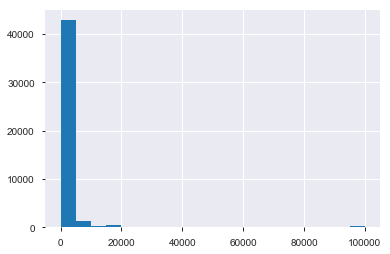

In [60]:
from IPython.display import display # Allows the use of display() for DataFrame
cg = df['capital-gain']
#sns.distplot(cg)
cg.hist(bins=20)

### Drop feature and Log transform

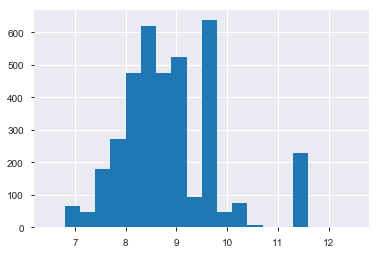

In [65]:
# Log-transform the skewed features
features_raw = data.drop('income', axis = 1)
skewed = ['capital-gain', 'capital-loss']
features_raw[skewed] = df[skewed].apply(lambda x: np.log(x + 1))
cg = features_raw['capital-gain']
#sns.distplot(cg)
cg.hist(bins=20, range=[6.5, 12.5])

### Normalize Numerical Features

In [69]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
features_raw[numerical] = scaler.fit_transform(data[numerical])

# Show an example of a record with scaling applied
features_raw.head(n = 1)

/home/yuzhi/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.30137,State-gov,Bachelors,0.8,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States


## Implementation: Data Preprocessing

### One-hot-encoding

In [70]:
# One-hot encode the 'features_raw' data using pandas.get_dummies()
features = pd.get_dummies(features_raw)

In [75]:
features.head(n=1)

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.30137,0.8,0.02174,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [76]:
features_raw.head(n=1)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.30137,State-gov,Bachelors,0.8,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States


In [79]:
# TODO: Encode the 'income_raw' data to numerical values
income_raw = data['income']
income = income_raw.apply(lambda x: 1 if x == ">50K" else 0)

In [83]:
# Print the number of features after one-hot encoding
encoded = list(features.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

103 total features after one-hot encoding.


### Shuffle and Split Data

In [88]:
# Import train_test_split
from sklearn.model_selection import train_test_split
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, income, test_size = 0.2, random_state = 0)

## Evalulating Model Performance

### Naive Predictor Performace

In [96]:
# TODO: Calculate accuracy

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score

income_pred=income.apply(lambda x:1)
print(accuracy_score(income, income_pred))
print(recall_score(income, income_pred))
beta = 0.5
print(fbeta_score(income, income_pred, beta))

0.2478439697492371
1.0
0.29172913543228385


### Supervised Learning

####  Model Application

I believe the most appropriate models to solve this problem are **Gaussian Naive Bayes**, **Support Vector Machines (SVC)** and the ensemble method **Adaboost**. 

The **Gaussian Naive Bayes** model has been widely used in the industry for text classification purposes. In particular for classifying and filtering spam emails based on the likelihood of certain words appearing on an spam email as compared to a non-spam email (ref: https://en.wikipedia.org/wiki/Naive_Bayes_spam_filtering). The strenght of this model lies in its simplicity inherited from the assumption that all features needed correctly to classify the data are "independent" from each other. This allows for the algorithm to be trained quickly and using less data. Furthermore, even when the underlying independence assumption is broken (i.e. when features have relationships between them), this algorithm still performs very well and is able to classify based on the maximum likelihood of a label given the set of features rather than on the actual probabilities of each feature. On the other hand, Naive Bayes' weakness is that if it encounters a previously unseen feature-label combination (on which it was never trained) it will incorrectly estimate likelyhood as 0 which can cause it to incorrectly classify the label. This particular model could be a good approach to solving the problem as we have a large data set with few features.

**Support Vector Machines (SVC)** have been used in the industry successfully for handwritten digit identification to a level close to human classification error (ref: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.89.951&rep=rep1&type=pdfProne). This model is effective in high dimensional spaces and best suited for problems with complex domains where there are clear margins of separation in the data. To correctly classify the data, this model is also capable of defining complex higher order separation planes through custom kernels. One of the weaknesses of this model is that training can be time consuming on large datasets. Also, SVCs can perform poorly and overfit when when the data is very noisy or overlaps too much. While training on our large current dataset may become an issue, the model could be still be a good candidate as there seems to be some features in the data that can more clearly define the income level boundary. 

**Adaboost** is a Boosting type Ensemble Learning Method. In the industry, boosting algorithms have been used for the binary classification problem of face detection where the algorithm has to identify wheter a portion of an image is a face or background (ref: https://en.wikipedia.org/wiki/Boosting_(machine_learning)). One of the main strenghts of Adaboost is that it is a fast algorithm, agnostic to the classifier and less prone to overfitting. During the iterative training, it continuously gives more weight to missclassified labels to allow the classifier to focus on the harder cases which increases the overall model's performance. On the other hand, noisy data and outliers in the data can negatively impact the performance so data pre processing is important. Furthermore, if a complex model is used as the base classifier, this can lead to overfitting to the training data. In my opinion, this model is a good candidate for the problem as our dataset is large yet clean. Therefore we will be able to perform multiple quick trainining iterations to maximize our overall accuracy on the unseen testing data.


### Implementation - Creating a Training and Predicting Pipeline

In [ ]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score

from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    learner.fit(X_train[:sample_size],y_train[:sample_size])
        
    # Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,beta=0.5)
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=0.5)
    #print(results)
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    return results

### Implementation: Initial Model Evaluation

In [113]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

# Initialize the three models
clf_A = GaussianNB()
clf_B = SVC(random_state=0)
clf_C = AdaBoostClassifier(random_state=0)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = len(X_train)//100
samples_10 = len(X_train)//10
#samples_100 = len(X_train)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)
        print(results)

# Run metrics visualization for the three supervised learning models chosen
#vs.evaluate(results, accuracy, fscore)

GaussianNB trained on 361 samples.
{'GaussianNB': {0: {'acc_train': 0.4, 'acc_test': 0.3517965726920951, 'f_train': 0.3333333333333333, 'f_test': 0.3101343466682625}}}
GaussianNB trained on 3617 samples.
{'GaussianNB': {0: {'acc_train': 0.4, 'acc_test': 0.3517965726920951, 'f_train': 0.3333333333333333, 'f_test': 0.3101343466682625}, 1: {'acc_train': 0.38666666666666666, 'acc_test': 0.3673852957435047, 'f_train': 0.3262867647058823, 'f_test': 0.3207908354021476}}}
GaussianNB trained on 36177 samples.
{'GaussianNB': {0: {'acc_train': 0.4, 'acc_test': 0.3517965726920951, 'f_train': 0.3333333333333333, 'f_test': 0.3101343466682625}, 1: {'acc_train': 0.38666666666666666, 'acc_test': 0.3673852957435047, 'f_train': 0.3262867647058823, 'f_test': 0.3207908354021476}, 2: {'acc_train': 0.5933333333333334, 'acc_test': 0.6082918739635158, 'f_train': 0.4125, 'f_test': 0.42811288507232487}}}


/home/yuzhi/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/yuzhi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/yuzhi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/yuzhi/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma

SVC trained on 361 samples.
{'GaussianNB': {0: {'acc_train': 0.4, 'acc_test': 0.3517965726920951, 'f_train': 0.3333333333333333, 'f_test': 0.3101343466682625}, 1: {'acc_train': 0.38666666666666666, 'acc_test': 0.3673852957435047, 'f_train': 0.3262867647058823, 'f_test': 0.3207908354021476}, 2: {'acc_train': 0.5933333333333334, 'acc_test': 0.6082918739635158, 'f_train': 0.4125, 'f_test': 0.42811288507232487}}, 'SVC': {0: {'acc_train': 0.76, 'acc_test': 0.7562189054726368, 'f_train': 0.0, 'f_test': 0.0}}}
SVC trained on 3617 samples.
{'GaussianNB': {0: {'acc_train': 0.4, 'acc_test': 0.3517965726920951, 'f_train': 0.3333333333333333, 'f_test': 0.3101343466682625}, 1: {'acc_train': 0.38666666666666666, 'acc_test': 0.3673852957435047, 'f_train': 0.3262867647058823, 'f_test': 0.3207908354021476}, 2: {'acc_train': 0.5933333333333334, 'acc_test': 0.6082918739635158, 'f_train': 0.4125, 'f_test': 0.42811288507232487}}, 'SVC': {0: {'acc_train': 0.76, 'acc_test': 0.7562189054726368, 'f_train': 0.0

/home/yuzhi/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC trained on 36177 samples.
{'GaussianNB': {0: {'acc_train': 0.4, 'acc_test': 0.3517965726920951, 'f_train': 0.3333333333333333, 'f_test': 0.3101343466682625}, 1: {'acc_train': 0.38666666666666666, 'acc_test': 0.3673852957435047, 'f_train': 0.3262867647058823, 'f_test': 0.3207908354021476}, 2: {'acc_train': 0.5933333333333334, 'acc_test': 0.6082918739635158, 'f_train': 0.4125, 'f_test': 0.42811288507232487}}, 'SVC': {0: {'acc_train': 0.76, 'acc_test': 0.7562189054726368, 'f_train': 0.0, 'f_test': 0.0}, 1: {'acc_train': 0.8333333333333334, 'acc_test': 0.8226644555002764, 'f_train': 0.6696428571428572, 'f_test': 0.6408459676391897}, 2: {'acc_train': 0.8366666666666667, 'acc_test': 0.8300718629076838, 'f_train': 0.6779661016949153, 'f_test': 0.6592375366568917}}}
AdaBoostClassifier trained on 361 samples.
{'GaussianNB': {0: {'acc_train': 0.4, 'acc_test': 0.3517965726920951, 'f_train': 0.3333333333333333, 'f_test': 0.3101343466682625}, 1: {'acc_train': 0.38666666666666666, 'acc_test': 0.

### Model Tunning

In [116]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

clf = AdaBoostClassifier(random_state=0)
parameters = {'n_estimators':[75,200,500],'learning_rate':[1.0,1.5,2.0]}
scorer = make_scorer(fbeta_score, beta=0.5)
grid_obj = GridSearchCV(clf, parameters,scoring=scorer)
grid_fit = grid_obj.fit(X_train, y_train)
best_clf = grid_fit.best_estimator_

predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

/home/yuzhi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/yuzhi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/yuzhi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/yuzhi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/yuzhi/an

Unoptimized model
------
Accuracy score on testing data: 0.8576
F-score on testing data: 0.7246

Optimized Model
------
Final accuracy score on the testing data: 0.8677
Final F-score on the testing data: 0.7452
